In [185]:
import tensorflow as tf

model = tf.keras.Model()
type(model)

keras.src.engine.training.Model

In [186]:
tf.keras.Model
"`Model` groups layers into an object with training and inference features."

'`Model` groups layers into an object with training and inference features.'

In [187]:
from tensorflow.keras.layers import Dense
import numpy as np

In [188]:
x = np.ones((4, 3)) # 4 объекта, 3 признака

dense_layer = Dense(units=1, input_shape=(3,))
output = dense_layer(x)
print(f"Output: {output}")

Output: [[-1.248137]
 [-1.248137]
 [-1.248137]
 [-1.248137]]


In [189]:
w, b = dense_layer.get_weights() 
print(f"Weights: {w}")
print(f"Bias: {b}")

Weights: [[-0.68576187]
 [ 0.0592562 ]
 [-0.62163126]]
Bias: [0.]


In [190]:
manual_output = np.matmul(x, w) + b
print(f"Manual output: {manual_output}")

Manual output: [[-1.24813694]
 [-1.24813694]
 [-1.24813694]
 [-1.24813694]]


In [191]:
x = np.ones((4, 3))
dense_layer = Dense(1, input_shape=(3,), use_bias=False) # можно инициализировать слой без баеса
output = dense_layer(x)
print(dense_layer.get_weights())

[array([[ 0.41404557],
       [-0.5612636 ],
       [ 0.2817384 ]], dtype=float32)]


А как же нам "прицепить" один слой к другому? Самый простой способ это использовать класс **Sequential. Sequential** создает каркас модели, в который затем последовательно добавляются слой за слоем с помощью метода add.

In [192]:
model = tf.keras.Sequential()
model.add(Dense(10, input_shape=(10,), activation="relu")) # скрытый слой 1
model.add(Dense(20, activation="relu", 
                bias_initializer=tf.keras.initializers.Constant(2.0))) # скрытый слой 2, с не дефолтной инициализацией
model.add(Dense(5, activation="softmax")) # выходной слой

In [193]:
sample_input = np.random.rand(2, 10)
output = model(sample_input)

print(output)

tf.Tensor(
[[0.22621636 0.00677004 0.01112068 0.00767351 0.7482193 ]
 [0.19853427 0.00211369 0.00723868 0.00226792 0.78984547]], shape=(2, 5), dtype=float32)


In [194]:
print(output.numpy().sum(1)) # на выходе -- софтмакс, значит сумма == 1

[0.9999999 1.       ]


In [195]:
# проверим как инициализирован второй скрытый слой 
# для этого обратимся к нему с помощью:
model.layers[1].get_weights()[1]

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2.], dtype=float32)

In [196]:
model.summary() # None обозначает, что размер батча может быть произвольный

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 10)                110       
                                                                 
 dense_77 (Dense)            (None, 20)                220       
                                                                 
 dense_78 (Dense)            (None, 5)                 105       
                                                                 
Total params: 435 (1.70 KB)
Trainable params: 435 (1.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [197]:
from tensorflow.keras.models import Sequential

In [198]:
# если не указать размер инпута в первом слое, то summary не сработает
model_no_input = tf.keras.Sequential()
model_no_input.add(Dense(10, activation="relu")) # скрытый слой 1 
model_no_input.add(Dense(20, activation="relu"))
model_no_input.add(Dense(5, activation="softmax")) # выходной слой

model_no_input.build(input_shape=(None, 5))

model_no_input.summary() # None обозначает, что размер батча может быть произвольный

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_79 (Dense)            (None, 10)                60        
                                                                 
 dense_80 (Dense)            (None, 20)                220       
                                                                 
 dense_81 (Dense)            (None, 5)                 105       
                                                                 
Total params: 385 (1.50 KB)
Trainable params: 385 (1.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [199]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [200]:
# cпециальный Инпут слой, показывает keras куда "положить" данные при использовании модели
input_layer = tf.keras.layers.Input(shape=(10, ), name="Input") 
l1 = Dense(10, name="Layer1") # определили первый слой
l1_output = l1(input_layer) # соеденили его с инпутом, "нарисовали" самую правую стрелку на картинке выше

l2_output = Dense(10, name="Layer2")(input_layer) # дальше будем определять чуть компактнее
l3_output = Dense(10, name="Layer3")(l2_output)
l4_output = Dense(10, name="Layer4")(l3_output)

l5_output = Dense(10, name="Layer5")(l2_output)

# специальный слой, который сложит выходы всех слоев, которые ему передали
sum_output = tf.keras.layers.Add(name="SumLayer")([l1_output, l4_output, l5_output])

# выходной слой
output = Dense(10, name="Output")(sum_output)

# создаем модель. нужно показать что мы считаем входом в нашу модель, а что выходом.
model = tf.keras.Model(inputs=input_layer, outputs=output)

tf.keras.utils.plot_model(model, show_shapes=False)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [201]:
model.summary()

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Input (InputLayer)          [(None, 10)]                 0         []                            
                                                                                                  
 Layer2 (Dense)              (None, 10)                   110       ['Input[0][0]']               
                                                                                                  
 Layer3 (Dense)              (None, 10)                   110       ['Layer2[0][0]']              
                                                                                                  
 Layer1 (Dense)              (None, 10)                   110       ['Input[0][0]']               
                                                                                           

In [202]:
y_true = np.random.rand(10)
y_pred = np.random.rand(10)

# MSE
# лосс функция принимает предсказанные значение и реальные, и возвращает значение, которое в идеале должно быть близко к 0 -- все просто
print(tf.keras.losses.MSE(y_true=y_true, y_pred=y_pred))

tf.Tensor(0.16442041406050512, shape=(), dtype=float64)


In [203]:
# Можно проверить, правильно ли MSE реализована в Keras :)
print(np.mean((y_true - y_pred)**2))

0.16442041406050512


In [204]:
# BCE

print(tf.keras.losses.binary_crossentropy(np.ones(10), np.ones(10)))

loss = tf.keras.losses.BinaryCrossentropy()
print(loss(np.ones(10), np.ones(10)))

tf.Tensor(0.0, shape=(), dtype=float64)
tf.Tensor(0.0, shape=(), dtype=float64)


In [205]:
tf.keras.optimizers.Adam, tf.keras.optimizers.SGD()

(keras.src.optimizers.adam.Adam,
 <keras.src.optimizers.sgd.SGD at 0x260f5045f10>)

In [206]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

# определим наш скромный датасет
celsius = np.array([-10, -40, 10, 20, 36, 5, -12, 14, 36]).astype(np.float32)
fahrenheit = np.array([14., -40., 50., 68., 96.8, 41., 10.4, 57.2, 96.8])

2.15.0


In [207]:
model = tf.keras.Sequential() # модель состоит из одного слоя с одним выходом и входом.
model.add(tf.keras.layers.Dense(1, input_shape=(1,)))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.5) 
loss = tf.keras.losses.MSE

In [208]:
# cледующий шаг -- компиляция модели: "связываем" модель, оптимайзер и лосс
model.compile(optimizer=optimizer, loss=loss) 

In [209]:
history = model.fit(celsius, fahrenheit, epochs=100, verbose=2)

Epoch 1/100


1/1 - 0s - loss: 2785.6550 - 428ms/epoch - 428ms/step
Epoch 2/100
1/1 - 0s - loss: 1864.7257 - 4ms/epoch - 4ms/step
Epoch 3/100
1/1 - 0s - loss: 1247.2356 - 5ms/epoch - 5ms/step
Epoch 4/100
1/1 - 0s - loss: 919.9918 - 0s/epoch - 0s/step
Epoch 5/100
1/1 - 0s - loss: 839.1968 - 9ms/epoch - 9ms/step
Epoch 6/100
1/1 - 0s - loss: 920.4845 - 8ms/epoch - 8ms/step
Epoch 7/100
1/1 - 0s - loss: 1053.8882 - 0s/epoch - 0s/step
Epoch 8/100
1/1 - 0s - loss: 1147.2869 - 0s/epoch - 0s/step
Epoch 9/100
1/1 - 0s - loss: 1158.8638 - 16ms/epoch - 16ms/step
Epoch 10/100
1/1 - 0s - loss: 1092.6711 - 3ms/epoch - 3ms/step
Epoch 11/100
1/1 - 0s - loss: 976.7903 - 4ms/epoch - 4ms/step
Epoch 12/100
1/1 - 0s - loss: 845.1835 - 10ms/epoch - 10ms/step
Epoch 13/100
1/1 - 0s - loss: 727.2849 - 30ms/epoch - 30ms/step
Epoch 14/100
1/1 - 0s - loss: 642.7022 - 3ms/epoch - 3ms/step
Epoch 15/100
1/1 - 0s - loss: 598.8863 - 4ms/epoch - 4ms/step
Epoch 16/100
1/1 - 0s - loss: 591.2533 - 3ms/epoch - 3ms/step
Epoch 17/100
1/1 -

In [210]:
model.get_weights()

[array([[1.8239594]], dtype=float32), array([30.607626], dtype=float32)]

In [211]:
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.head()

,loss
0,2785.655029
1,1864.725708
2,1247.235596
3,919.991760
4,839.196777


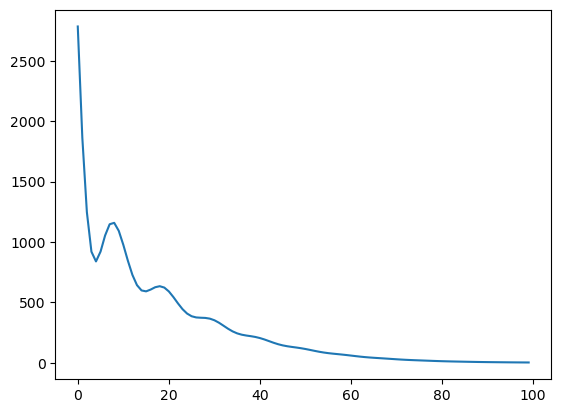

In [212]:
import matplotlib.pyplot as plt
plt.plot(history_df.loss)

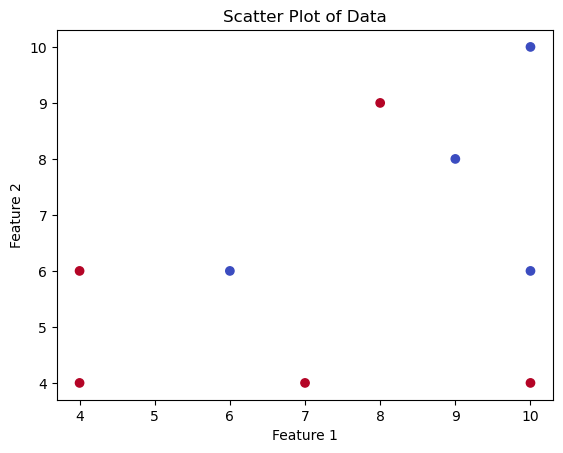

In [214]:
import matplotlib.pyplot as plt

def show_data(X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Scatter Plot of Data')
    plt.show()

X = np.array([[10, 6], [7, 4], [6, 6], [9, 8], [10, 10],
              [10, 4], [4, 4], [4, 6], [8, 9]])
y = np.array([0, 1, 0, 0, 0, 1, 1, 1, 1])

show_data(X, y)


In [215]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, input_shape=(2,), activation="sigmoid"))
model.add(tf.keras.layers.Dense(1)) # мы хотим визуализировать логиты, поэтому без активации

optimizer = tf.keras.optimizers.Adam(learning_rate=0.05) 
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True) # лосс -- с логитами

In [216]:
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"]) # для дополнительного контроля 
                                                                    #-- просим сообщать не только лосс, но и точность.
history = model.fit(X, y, epochs=100, verbose=2)

Epoch 1/100

1/1 - 1s - loss: 1.0705 - accuracy: 0.4444 - 783ms/epoch - 783ms/step
Epoch 2/100
1/1 - 0s - loss: 0.9665 - accuracy: 0.4444 - 5ms/epoch - 5ms/step
Epoch 3/100
1/1 - 0s - loss: 0.8804 - accuracy: 0.4444 - 4ms/epoch - 4ms/step
Epoch 4/100
1/1 - 0s - loss: 0.8155 - accuracy: 0.4444 - 4ms/epoch - 4ms/step
Epoch 5/100
1/1 - 0s - loss: 0.7683 - accuracy: 0.4444 - 6ms/epoch - 6ms/step
Epoch 6/100
1/1 - 0s - loss: 0.7345 - accuracy: 0.4444 - 4ms/epoch - 4ms/step
Epoch 7/100
1/1 - 0s - loss: 0.7107 - accuracy: 0.4444 - 6ms/epoch - 6ms/step
Epoch 8/100
1/1 - 0s - loss: 0.6944 - accuracy: 0.4444 - 3ms/epoch - 3ms/step
Epoch 9/100
1/1 - 0s - loss: 0.6839 - accuracy: 0.4444 - 5ms/epoch - 5ms/step
Epoch 10/100
1/1 - 0s - loss: 0.6777 - accuracy: 0.4444 - 6ms/epoch - 6ms/step
Epoch 11/100
1/1 - 0s - loss: 0.6756 - accuracy: 0.6667 - 5ms/epoch - 5ms/step
Epoch 12/100
1/1 - 0s - loss: 0.6795 - accuracy: 0.7778 - 5ms/epoch - 5ms/step
Epoch 13/100
1/1 - 0s - loss: 0.6861 - accuracy: 0.5556 

313/313 [==============================] - 2s 1ms/step


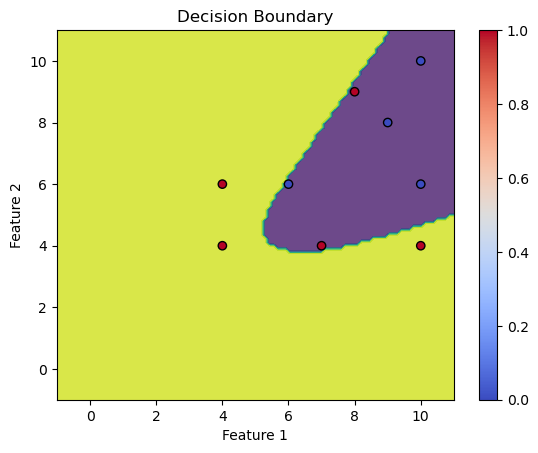

In [218]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, model, limits=[-1, 11], binary=True, n_lines=100, show_lines=True):
    xx, yy = np.meshgrid(np.linspace(limits[0], limits[1], n_lines),
                         np.linspace(limits[0], limits[1], n_lines))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    if binary:
        Z = (Z > 0.5).astype(int)
    
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    
    if show_lines:
        plt.colorbar()
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

# Пример использования
plot_decision_boundary(X, y, model)


In [219]:
pd.DataFrame(history.history).head()

,loss,accuracy
0,1.070541,0.444444
1,0.966517,0.444444
2,0.880414,0.444444
3,0.815521,0.444444
4,0.768306,0.444444
